In [4]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [6]:
IMAGE_SIZE = 256
CHANNELS = 3
EPOCHS = 10
BATCH_SIZE = 32

In [8]:
data = tf.keras.preprocessing.image_dataset_from_directory(
    r'C:\Users\Admin\Downloads\Apple Project\Apple_Dataset',
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True
)

Found 7771 files belonging to 4 classes.


In [9]:
class_names = data.class_names
class_names

['Apple Scab', 'Black Rot', 'Cedar Apple Rust', 'Healthy']

In [10]:
len(data)

243

In [11]:
243 * 32

7776

In [13]:
0.8 * len(data)

194.4

In [25]:
for image_batch, label_batch in data.take(1):
            print(image_batch[0].numpy())
            print(label_batch[0].numpy())

[[[107. 104.  99.]
  [108. 105. 100.]
  [102.  99.  94.]
  ...
  [120. 111. 106.]
  [119. 110. 105.]
  [118. 109. 104.]]

 [[102.  99.  94.]
  [101.  98.  93.]
  [ 97.  94.  89.]
  ...
  [120. 111. 106.]
  [119. 110. 105.]
  [118. 109. 104.]]

 [[100.  97.  92.]
  [ 97.  94.  89.]
  [ 93.  90.  85.]
  ...
  [121. 112. 107.]
  [119. 110. 105.]
  [118. 109. 104.]]

 ...

 [[152. 149. 144.]
  [154. 151. 146.]
  [164. 161. 156.]
  ...
  [161. 157. 158.]
  [160. 156. 157.]
  [160. 156. 157.]]

 [[153. 150. 145.]
  [152. 149. 144.]
  [160. 157. 152.]
  ...
  [162. 158. 159.]
  [162. 158. 159.]
  [161. 157. 158.]]

 [[166. 163. 158.]
  [161. 158. 153.]
  [164. 161. 156.]
  ...
  [163. 159. 160.]
  [163. 159. 160.]
  [163. 159. 160.]]]
2


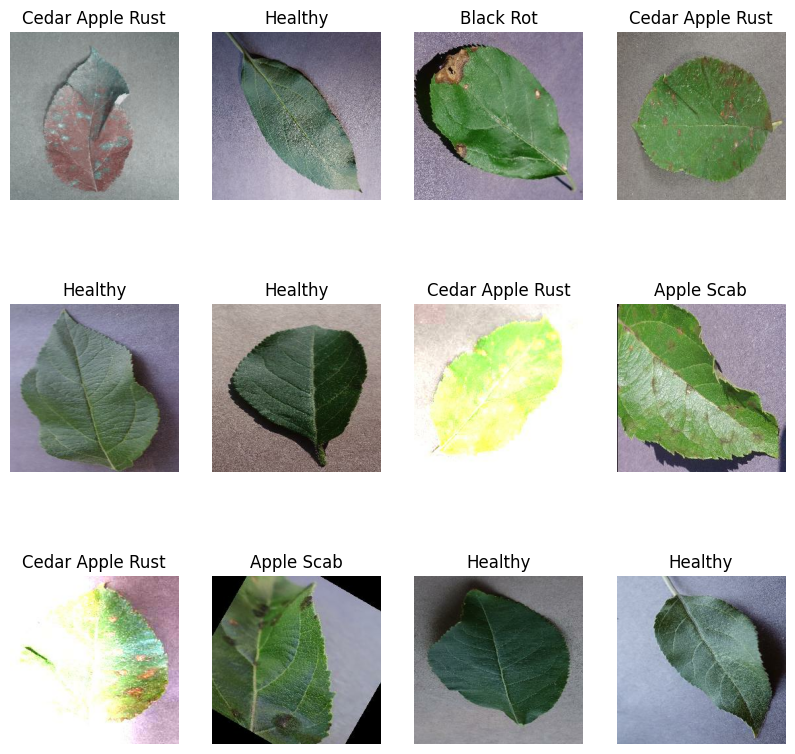

In [40]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in data.take(1):
    
    for i in range(12):
        ax = plt.subplot(3,4,i +1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

In [52]:
def split_data(ds, train_per =0.8, test_per = 0.1, val_per = 0.1, shuffle_size = 10000, shuffle = True):
    
    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 12)
    
    train_size = int(train_per * ds_size)
    val_size = int(val_per * ds_size)
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    return train_ds, test_ds, val_ds

In [53]:
train_ds, test_ds, val_ds = split_data(data)

In [54]:
len(train_ds)

194

In [55]:
len(test_ds)

25

In [56]:
len(val_ds)

24

In [57]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

RESCALING AND RESIZING

In [58]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Resizing, Rescaling

resize_and_rescale = Sequential([
    Resizing(256, 256),
    Rescaling(1.0/255)
])


DATA AUGEMENTATION

In [60]:
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom
from tensorflow.keras.models import Sequential

data_augementation = Sequential([RandomFlip('horizontal_and_vertical'),
                                 RandomRotation(0.2)])

In [62]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
model = models.Sequential([
    resize_and_rescale,
    data_augementation,
    layers.Conv2D(32, (3,3), activation= 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation= 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation= 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation= 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation= 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation= 'relu'),
    layers.Dense(4, activation='softmax'),

])
model.build(input_shape= input_shape)

In [63]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 2304)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 64)               │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 4)                │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 277,956 (1.06 MB)

 Trainable params: 277,956 (1.06 MB)

 Non-trainable params: 0 (0.00 B)

In [64]:
model.compile(optimizer= 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics = ['accuracy'])


In [ ]:
model.fit(train_ds,
          epochs = EPOCHS,
          batch_size = BATCH_SIZE,
          verbose =1,
          validation_data = val_ds)